# Hey README, tell me your secrets 

In [3]:
# data wrangling
import pandas as pd
import numpy as np
import nltk

#visuals
import matplotlib.pyplot as plt
import seaborn as sns

# modules
import acquire
import prepare
import explore
import model

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

## Acquire

A list of pages to scrape are generated using the `acquire.loop_through_urls` function. They are saved to a csv and that csv file is being read for further manipulation. 

In [4]:
# to_scrape = acquire.loop_through_urls()
# to_scrape = pd.DataFrame(to_scrape)
# to_scrape.to_csv("URL_list_100.csv")

In [5]:
# read in list of pages generated from function 
pd.read_csv("URL_list_100.csv", header=0, names=["page"])

,page
0,http://github.com/freeCodeCamp/freeCodeCamp
1,http://github.com/996icu/996.ICU
2,http://github.com/vuejs/vue
3,http://github.com/facebook/react
4,http://github.com/tensorflow/tensorflow
...,...
95,http://github.com/ansible/ansible
96,http://github.com/kdn251/interviews
97,http://github.com/gatsbyjs/gatsby
98,http://github.com/opencv/opencv


The dataframe of pages is looped through, and on each page, it's respective repository, language, and readme is extracted as a dictionary, using the `acquire.make_corpus` function. 

This fuction was utilized twice to make two separate json files, titled `data_first.json` and `data_second.json`. These files are saved into the directory to prevent needless scraping from github. 

The two json files are read in as dataframes are concatted together using the `acquire.get_big_corpus` fuction and a final datafram is returned.

In [6]:
df = acquire.get_big_corpus()

In [7]:
df

,repo,language,readme
0,freeCodeCamp/freeCodeCamp,JavaScript,\n\n\n\n\n\nfreeCodeCamp.org's open-source cod...
1,996icu/996.ICU,Rust,\n996.ICU\nPlease note that there exists NO ot...
2,vuejs/vue,JavaScript,\n\n\n\n\n\n\n\n\n\n\n\nSupporting Vue.js\nVue...
3,facebook/react,JavaScript,\nReact · \nReact is a JavaScript library f...
4,tensorflow/tensorflow,C++,\n\n\n\n\n\n\nDocumentation\n\n\n\n\n\n\n\n\nT...
...,...,...,...
85,Trinea/android-open-project,None,\nAndroid 开源项目分类汇总，更全更新可见 codekk.com\nOther: E...
86,PhilJay/MPAndroidChart,Java,\n\n\n\n\n\n\n⚡️ A powerful & easy to use char...
87,tiimgreen/github-cheat-sheet,None,\nGitHub Cheat Sheet \nA collection of cool hi...
88,XX-net/XX-Net,Python,\nXX-Net\n中文文档 English فارسی صفحه اص...


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 190 entries, 0 to 89
Data columns (total 3 columns):
repo        190 non-null object
language    190 non-null object
readme      190 non-null object
dtypes: object(3)
memory usage: 5.9+ KB


> The corpus is acquired with 190 repositories ready for preparation.

## Prepare

In [9]:
df.language.value_counts(dropna=False)

JavaScript          59
None                29
Python              21
Java                15
C++                 12
Go                   9
TypeScript           9
CSS                  5
C                    4
Ruby                 3
Vue                  3
Shell                2
Kotlin               2
Rust                 2
Jupyter Notebook     2
HTML                 2
PHP                  2
Swift                2
Clojure              1
Objective-C          1
Vim script           1
Dart                 1
Dockerfile           1
C#                   1
Assembly             1
Name: language, dtype: int64

As there are many languages utilized, and many of them are only represented in one repository, it was determined to limit the languages represented to ten. Using the `prepare.cut_singles` function, only the top ten language are retained and their respective rows.

In [10]:
df = prepare.cut_singles(df)

In [11]:
df.language.value_counts()

JavaScript    59
None          29
Python        21
Java          15
C++           12
Go             9
TypeScript     9
CSS            5
C              4
Ruby           3
Name: language, dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 166 entries, 0 to 89
Data columns (total 3 columns):
repo        166 non-null object
language    166 non-null object
readme      166 non-null object
dtypes: object(3)
memory usage: 5.2+ KB


> The corpus now contains ten different programming languages and 166 repositories

In [15]:
df

,repo,language,readme
0,freeCodeCamp/freeCodeCamp,JavaScript,\n\n\n\n\n\nfreeCodeCamp.org's open-source cod...
2,vuejs/vue,JavaScript,\n\n\n\n\n\n\n\n\n\n\n\nSupporting Vue.js\nVue...
3,facebook/react,JavaScript,\nReact · \nReact is a JavaScript library f...
4,tensorflow/tensorflow,C++,\n\n\n\n\n\n\nDocumentation\n\n\n\n\n\n\n\n\nT...
5,twbs/bootstrap,JavaScript,"\n\n\n\n\n\nBootstrap\n\n Sleek, intuitive, a..."
...,...,...,...
85,Trinea/android-open-project,None,\nAndroid 开源项目分类汇总，更全更新可见 codekk.com\nOther: E...
86,PhilJay/MPAndroidChart,Java,\n\n\n\n\n\n\n⚡️ A powerful & easy to use char...
87,tiimgreen/github-cheat-sheet,None,\nGitHub Cheat Sheet \nA collection of cool hi...
88,XX-net/XX-Net,Python,\nXX-Net\n中文文档 English فارسی صفحه اص...


To clean up the readme's, a few functions were applied:

- `prepare.basic_clean` - lowercases, normalizes unicodes, and remove anything that isn't a number, letter, or whitespace
- `prepare.remove_stopwords` - removes standard stopwords
- `prepare.lemmatize` - lemmatizes each work

In [16]:
df['prepared'] = df.readme.apply(prepare.basic_clean).apply(prepare.remove_stopwords).apply(prepare.lemmatize)

In [17]:
df

,repo,language,readme,prepared
0,freeCodeCamp/freeCodeCamp,JavaScript,\n\n\n\n\n\nfreeCodeCamp.org's open-source cod...,freecodecamporg's opensource codebase curricul...
2,vuejs/vue,JavaScript,\n\n\n\n\n\n\n\n\n\n\n\nSupporting Vue.js\nVue...,supporting vuejs vuejs mitlicensed open source...
3,facebook/react,JavaScript,\nReact · \nReact is a JavaScript library f...,react react javascript library building user i...
4,tensorflow/tensorflow,C++,\n\n\n\n\n\n\nDocumentation\n\n\n\n\n\n\n\n\nT...,documentation tensorflow endtoend open source ...
5,twbs/bootstrap,JavaScript,"\n\n\n\n\n\nBootstrap\n\n Sleek, intuitive, a...",bootstrap sleek intuitive powerful frontend fr...
...,...,...,...,...
85,Trinea/android-open-project,None,\nAndroid 开源项目分类汇总，更全更新可见 codekk.com\nOther: E...,android codekkcom english version website vers...
86,PhilJay/MPAndroidChart,Java,\n\n\n\n\n\n\n⚡️ A powerful & easy to use char...,powerful easy use chart library android chart ...
87,tiimgreen/github-cheat-sheet,None,\nGitHub Cheat Sheet \nA collection of cool hi...,github cheat sheet collection cool hidden hidd...
88,XX-net/XX-Net,Python,\nXX-Net\n中文文档 English فارسی صفحه اص...,xxnet english gaeproxyxtunnel gaeproxy xtunnel...


> It is seen the `prepared` column that emojis, foreign characters, line breaks, extra spaces, and special characters are removed. Lemmatization was also utilized which attempted to transform each word to their root word.

## Explore

#### The breakdown of programming languages analyzed

In [41]:
# the count and percent of each language
explore.count_percent(df)

,n,percent
JavaScript,59,0.355422
None,29,0.174699
Python,21,0.126506
Java,15,0.090361
C++,12,0.072289
Go,9,0.054217
TypeScript,9,0.054217
CSS,5,0.030120
C,4,0.024096
Ruby,3,0.018072


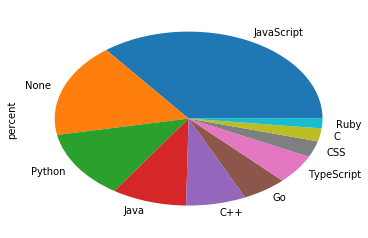

In [42]:
# we know how much you like pie
explore.count_percent(df).percent.plot.pie()
plt.show()

#### Explore the lengths of readmes based on their respective programming language

In [43]:
explore.readme_length(df).sort_values("mean", ascending=False)

,min,mean,max
language,,,
None,70,4422.206897,25882
Go,65,3634.555556,21653
Python,4,3071.333333,13706
C,98,2423.500000,6075
JavaScript,73,2133.033898,19624
Java,126,848.800000,3568
C++,59,758.500000,2288
TypeScript,52,588.777778,2641
Ruby,379,517.000000,587


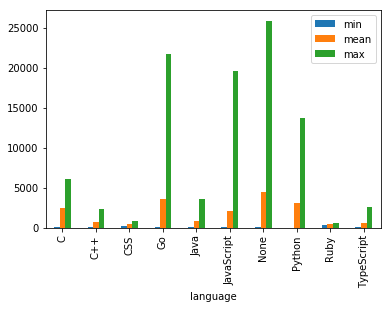

In [51]:
explore.readme_length(df).plot.bar()
plt.show()

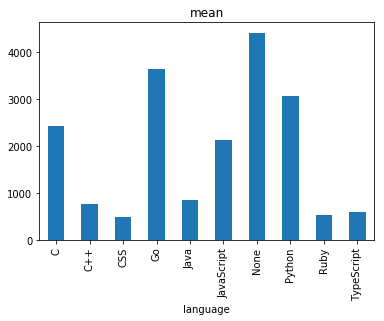

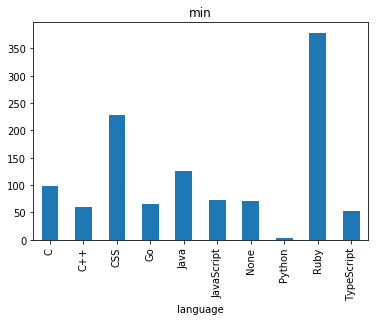

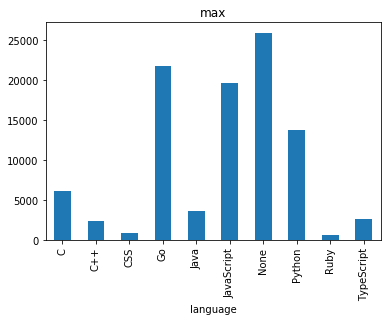

In [64]:
explore.readme_length(df)["mean"].plot.bar()
plt.title("mean")
plt.show()
explore.readme_length(df)["min"].plot.bar()
plt.title("min")
plt.show()
explore.readme_length(df)["max"].plot.bar()
plt.title("max")
plt.show()

In [25]:
# inspect the None languages
df [df.language == "None"].head()

,repo,language,readme,prepared,length
6,EbookFoundation/free-programming-books,None,\nThis page is available as an easy-to-read we...,page available easytoread website httpsebookfo...,247
7,sindresorhus/awesome,None,\n\n\n\n\n\n\n\nMy open source work is support...,open source work supported community special t...,3056
8,getify/You-Dont-Know-JS,None,\nYou Don't Know JS Yet (book series) - 2nd Ed...,know j yet book series 2nd edition series book...,352
10,jwasham/coding-interview-university,None,\nCoding Interview University\n\nI originally ...,coding interview university originally created...,10474
11,github/gitignore,None,\nA collection of .gitignore templates\nThis i...,collection gitignore template githubs collecti...,969


> The langauge "None" references github's that appear to contain cirriculums or books and mainly do not contain code. It is expected that these descriptive repositories would be the longest in length.

#### Combine readmes together by language

Use the `explore.words_dict` function to create a dictionary where the key is the language type and the value is the all of the readme contents of that language.

In [97]:
words = explore.words_dict(df)

In [98]:
words.keys()

dict_keys(['javascript_words', 'c++_words', 'none_words', 'typescript_words', 'java_words', 'c_words', 'python_words', 'go_words', 'css_words', 'ruby_words', 'all_words'])

#### Explore promiment word counts

Utilize the `explore.word_count_by_lang` function to investigate the word count by language

In [99]:
word_counts = explore.word_count_by_lang(words)

In [102]:
# every single word and it's count in the top four langauges
word_counts

,all,javascript,python,java,none
',52,19,5,22,4
'',35,21,9,0,4
''amp4,1,0,1,0,0
''join,1,1,0,0,0
''this',2,2,0,0,0
...,...,...,...,...,...
zynga,1,0,1,0,0
zypper,1,1,0,0,0
zyszys,1,1,0,0,0
zyszys98gmailcom,1,1,0,0,0


In [103]:
# sorted word count by top words
word_counts.sort_values(by='all', ascending=False).head(20)

,all,javascript,python,java,none
code,1747,1056,161,25,286
data,1479,223,531,29,533
source,1348,904,139,42,125
file,1340,482,230,15,408
use,1264,499,198,42,335
go,1216,136,54,4,95
library,1181,130,438,23,183
using,1120,389,150,24,354
video,941,121,230,3,564
python,926,147,488,1,247


### Word Cloud Explosion

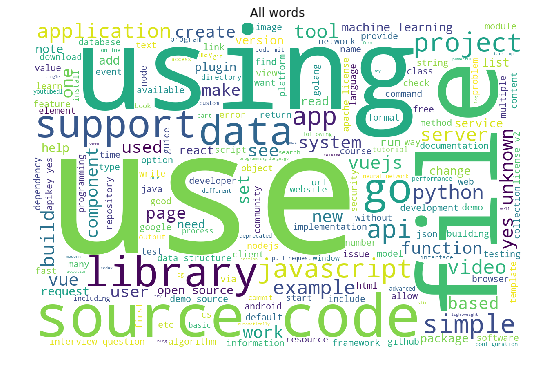

In [105]:
explore.one_word_one_cloud(words["all_words"], "All words")

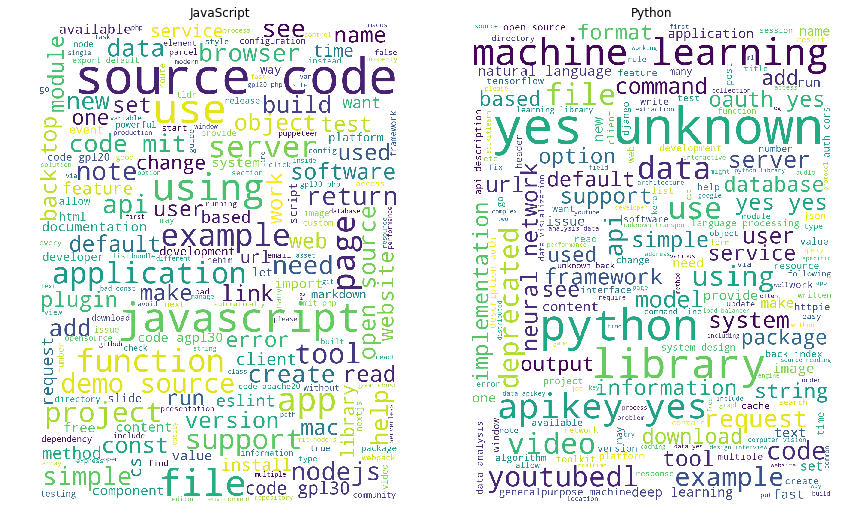

In [106]:
explore.one_word_two_cloud(words["javascript_words"],words["python_words"],"JavaScript","Python")

#### make some bigrams! (using the top 50 combinations of words)

In [107]:
# create bigrams for the top for languages
javascript_bigram = pd.Series(nltk.ngrams(words["javascript_words"].split(), 2)).value_counts().head(50)
python_bigram = pd.Series(nltk.ngrams(words["python_words"].split(), 2)).value_counts().head(50)
java_bigram = pd.Series(nltk.ngrams(words["java_words"].split(), 2)).value_counts().head(50)
none_bigram = pd.Series(nltk.ngrams(words["none_words"].split(), 2)).value_counts().head(50)

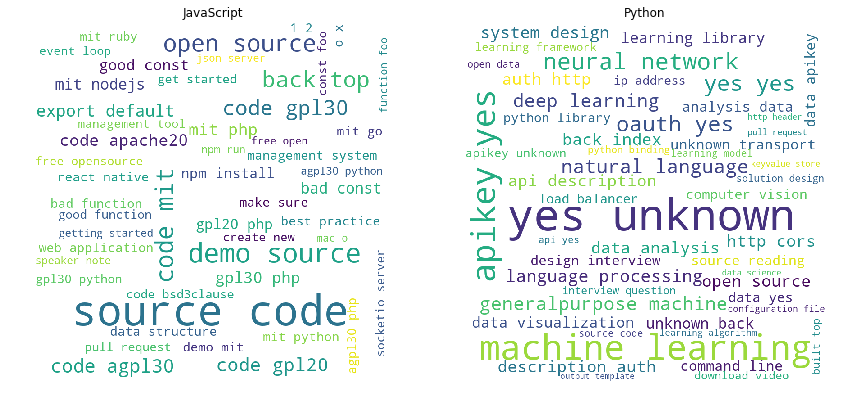

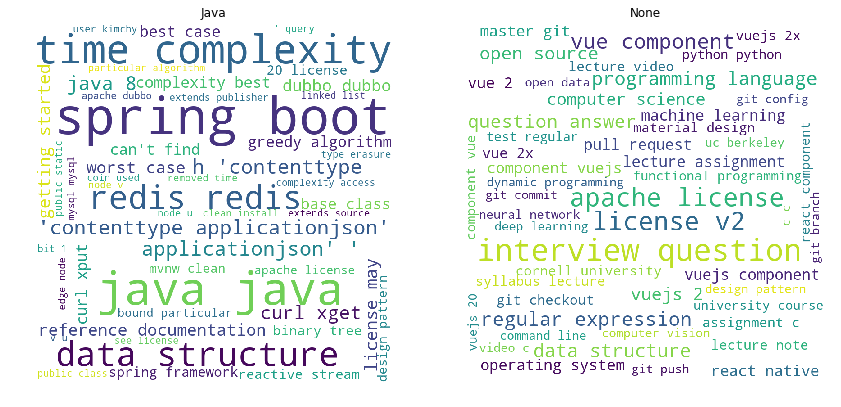

In [108]:
# explore the bigrams in a word cloud
explore.two_word_two_cloud(javascript_bigram, python_bigram, "JavaScript", "Python")
explore.two_word_two_cloud(java_bigram, none_bigram, "Java", "None")

#### make some trigrams! (using the top 20 combinations of words)

In [109]:
# create trigrams for the top four languages
javascript_trigram = pd.Series(nltk.ngrams(words["javascript_words"].split(), 3)).value_counts().head(20)
python_trigram = pd.Series(nltk.ngrams(words["python_words"].split(), 3)).value_counts().head(20)
java_trigram = pd.Series(nltk.ngrams(words["java_words"].split(), 3)).value_counts().head(20)
none_trigram = pd.Series(nltk.ngrams(words["none_words"].split(), 3)).value_counts().head(20)

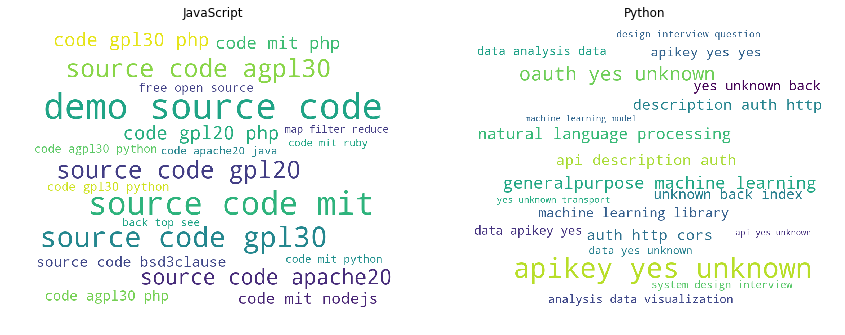

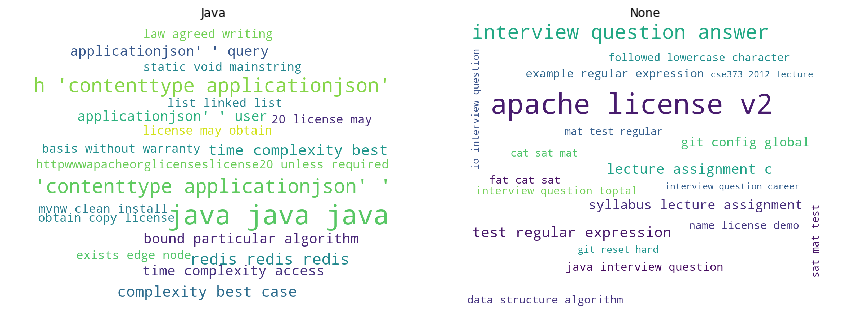

In [110]:
# explore using word clouds
explore.three_word_two_cloud(javascript_trigram, python_trigram, "JavaScript", "Python")
explore.three_word_two_cloud(java_trigram, none_trigram, "Java", "None")

## Split

The data is broken into training and testing sets. In this instance it will be a 70/30 split.

In [84]:
# the train and test were split using a random state of 42
X_train, X_test, train, test = model.make_model_components(df.prepared, df.language, .30)

## Model - Baseline

In [85]:
# used to establish a baseline
explore.count_percent(df)

,n,percent
JavaScript,59,0.355422
None,29,0.174699
Python,21,0.126506
Java,15,0.090361
C++,12,0.072289
Go,9,0.054217
TypeScript,9,0.054217
CSS,5,0.030120
C,4,0.024096
Ruby,3,0.018072


> The baseline model is predicting JavaScript for every repro. This gives a 35% accuracy. 

## Model - Decision Tree

In [86]:
# decision tree model created and fit, utilizing a max depth of 5 and a random state of 42
classifier = model.make_tree_model(X_train, train.actual)

In [90]:
# predict on the train
training_predictions = classifier.predict(X_train)
train['predictions'] = training_predictions

#predict on the test
test_predictions = classifier.predict(X_test)
test['predictions'] = test_predictions

In [91]:
train

,actual,predictions
44,TypeScript,TypeScript
32,CSS,CSS
4,CSS,None
3,JavaScript,JavaScript
83,JavaScript,JavaScript
...,...,...
92,Java,Java
4,C++,C++
42,JavaScript,JavaScript
12,JavaScript,JavaScript


#### Accuracy scores for the model on the training set

In [30]:
model.score_your_model(train.actual, train.predictions)

Accuracy: 79.31%
---
Confusion Matrix
actual       C  C++  CSS  Go  Java  JavaScript  None  Python  Ruby  TypeScript
predictions                                                                   
C++          0    4    0   0     0           1     0       0     0           0
CSS          0    0    3   0     0           0     0       0     0           0
Go           0    0    0   4     0           0     0       0     0           0
Java         0    0    0   0     9           0     0       0     0           0
JavaScript   0    0    0   0     0          38     0       0     0           0
None         3    4    1   2     2           2    20       3     2           4
Python       0    0    0   0     0           0     0      12     0           0
TypeScript   0    0    0   0     0           0     0       0     0           2
---
              precision    recall  f1-score   support

           C       0.00      0.00      0.00         3
         C++       0.80      0.50      0.62         8
     

> The decision tree performs very well at almost 80%. A con of the decision tree is that it's highly likely to overfit the data. Must run the test data to verify. 

#### Accuracy scores for the model on the test set

In [31]:
model.score_your_model(test.actual, test.predictions)

Accuracy: 50.00%
---
Confusion Matrix
actual       C  C++  CSS  Go  Java  JavaScript  None  Python  Ruby  TypeScript
predictions                                                                   
C++          0    1    0   0     0           0     0       1     0           0
Go           0    1    0   1     1           1     1       1     0           0
Java         0    0    0   0     2           0     0       0     0           0
JavaScript   0    2    1   0     0          16     3       0     0           3
None         1    0    0   2     1           0     3       2     1           0
Python       0    0    0   0     0           1     2       2     0           0
---
              precision    recall  f1-score   support

           C       0.00      0.00      0.00         1
         C++       0.50      0.25      0.33         4
         CSS       0.00      0.00      0.00         1
          Go       0.17      0.33      0.22         3
        Java       1.00      0.50      0.67         4
 

> The test performed at 50% which is one of the best balances of train and test obtained.

## Model - Random Forest

In [93]:
# random forest model created and fit, utilizing a max depth of 7 and a random state of 42
classifier = model.make_forest_model(X_train, train.actual, depth=7, trees=100)

In [94]:
# predict on the train
training_predictions = classifier.predict(X_train)
train['predictions'] = training_predictions

# predict on the train
test_predictions = classifier.predict(X_test)
test['predictions'] = test_predictions

#### Accuracy scores for the model on the Training set

In [95]:
model.score_your_model(train.actual, train.predictions)

Accuracy: 62.07%
---
Confusion Matrix
actual       C  C++  CSS  Go  Java  JavaScript  None  Python  Ruby  TypeScript
predictions                                                                   
C            1    0    0   0     0           0     0       0     0           0
C++          0    2    0   0     0           0     0       0     0           0
Go           0    0    0   1     0           0     0       0     0           0
Java         0    0    0   0     2           0     0       0     0           0
JavaScript   2    6    4   5     9          41     3       7     2           6
None         0    0    0   0     0           0    17       0     0           0
Python       0    0    0   0     0           0     0       8     0           0
---
              precision    recall  f1-score   support

           C       1.00      0.33      0.50         3
         C++       1.00      0.25      0.40         8
         CSS       0.00      0.00      0.00         4
          Go       1.00      0

> Performed worse than decision tree

#### Accuracy scores for the model on the Test set

In [96]:
model.score_your_model(test.actual, test.predictions)

Accuracy: 36.00%
---
Confusion Matrix
actual       C  C++  CSS  Go  Java  JavaScript  None  Python  Ruby  TypeScript
predictions                                                                   
JavaScript   1    4    1   2     4          17     8       5     1           3
None         0    0    0   1     0           1     1       1     0           0
---
              precision    recall  f1-score   support

           C       0.00      0.00      0.00         1
         C++       0.00      0.00      0.00         4
         CSS       0.00      0.00      0.00         1
          Go       0.00      0.00      0.00         3
        Java       0.00      0.00      0.00         4
  JavaScript       0.37      0.94      0.53        18
        None       0.25      0.11      0.15         9
      Python       0.00      0.00      0.00         6
        Ruby       0.00      0.00      0.00         1
  TypeScript       0.00      0.00      0.00         3

    accuracy                           0.36   

> The test accuracy was abysmal. Random Forest performed worse than decision tree consistently and will not be retained as the final model. 

## Recap

#### Acquire
- The dataset was created by webscraping readmes from github that had more than 100 stars
    - The initial dataset contained the repo link, the main programming language utilized, and the respective README

#### Prepare
- The corpus (readmes) was cleaned by removing anything that wasn't a letter, number, or whitespace and them lemmatized

#### Explore
- The corpus was explored by looking at language counts, and promiment words by languages

#### Model
- The baseline model predicts all JavaScript and has an accuracy of 35%
- The input into the final model consisted of single words and a TF-DIF feature matrix
- It was found that Decision Tree performed the best with a depth of 5, will an overall accuracy of 50%
- Model is most effective at finding JavaScript

#### In the future

- Reattempt with removing repos that do not contain programming languages  
- Further investigate words to reduce features down to essential terms
- Attempt model using bigrams and trigrams
